# About this notebook:
    This notebook is to sum up all the tensorflow techniques to deal with text data. 

# Pre-Processing 
### i. Tokenizer : 
#### It allows to tokenize/encode all the words. 

1. ***Attributes:***
    1. **num_of_words** : Number of dictionary words.
    2. **oov_token** : To deal with previously unseen words, this will token the unseen words with the given value .
2. ***Methods:***
    1. **fit_on_texts**: This method fits the words and tokenize them. Same as train data.
    2. **word_index**: This method contains all the tokenized word index.
    2. **texts_to_sequences**: This method transforms text to sequence.it is used to encode a list of sentences to use those tokens.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 100)
sample_lines = ['It is what it is', 'to be or not to be', 
                'you better keep up','i am better than you'
               'you are a good person', 'this is not funny']
tokenizer.fit_on_texts(sample_lines)
print('Dictionary:', tokenizer.word_index)
print('\nTrain Sequence:',tokenizer.texts_to_sequences(sample_lines))
test_line = ['you are a funny person ', 'i am better than you', 'shut up']
print('\nTest Sequence: ',tokenizer.texts_to_sequences(test_line))

Dictionary: {'is': 1, 'it': 2, 'to': 3, 'be': 4, 'not': 5, 'better': 6, 'what': 7, 'or': 8, 'you': 9, 'keep': 10, 'up': 11, 'i': 12, 'am': 13, 'than': 14, 'youyou': 15, 'are': 16, 'a': 17, 'good': 18, 'person': 19, 'this': 20, 'funny': 21}

Train Sequence: [[2, 1, 7, 2, 1], [3, 4, 8, 5, 3, 4], [9, 6, 10, 11], [12, 13, 6, 14, 15, 16, 17, 18, 19], [20, 1, 5, 21]]

Test Sequence:  [[9, 16, 17, 21, 19], [12, 13, 6, 14, 9], [11]]


The **fit_on_texts** method uses the corpus of data as train data.It creates a dictionary of words. So if the the test data have any unmatched data with the train data, it will be blank/ lost, like the last sentence of the test_line. To avoid this problem we can use **oov_token**.

### ii. pad_sequences:
#### This is used for padding all the sentences , so that all the lines are in same format. Returns a matrix of sequences.

1. Attributes:
    1. **sequences** : sequences that needs padding.
    2. **max_len** : max length of the padded sequence matrix.
    3. **padding** : Padding types , pre or post.

In [2]:
#updated code
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 100, oov_token = '<unseen>')

sample_lines = ['It is what it is', 'to be or not to be', 
                'you better keep up','i am better than you',
               'you are a good person', 'this is not funny']
tokenizer.fit_on_texts(sample_lines)
word_index = tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(sample_lines)
print('Dictionary:\n', word_index)
print('===================================================\n Train Lines: \n',sample_lines )
print('Train Sequence(unpadded):\n', sequences_train)
print('Train Sequence(padded):\n', pad_sequences(sequences_train))


test_lines = ['you are a funny person ', 'i am better than you', 'shut up']
sequences_test = tokenizer.texts_to_sequences(test_lines)
print('===================================================\n Test Lines: \n',test_lines )
print('Test Sequence(unpadded): \n',sequences_test)
print('test Sequence(padded): \n', pad_sequences(sequences_test))

Dictionary:
 {'<unseen>': 1, 'is': 2, 'you': 3, 'it': 4, 'to': 5, 'be': 6, 'not': 7, 'better': 8, 'what': 9, 'or': 10, 'keep': 11, 'up': 12, 'i': 13, 'am': 14, 'than': 15, 'are': 16, 'a': 17, 'good': 18, 'person': 19, 'this': 20, 'funny': 21}
 Train Lines: 
 ['It is what it is', 'to be or not to be', 'you better keep up', 'i am better than you', 'you are a good person', 'this is not funny']
Train Sequence(unpadded):
 [[4, 2, 9, 4, 2], [5, 6, 10, 7, 5, 6], [3, 8, 11, 12], [13, 14, 8, 15, 3], [3, 16, 17, 18, 19], [20, 2, 7, 21]]
Train Sequence(padded):
 [[ 0  4  2  9  4  2]
 [ 5  6 10  7  5  6]
 [ 0  0  3  8 11 12]
 [ 0 13 14  8 15  3]
 [ 0  3 16 17 18 19]
 [ 0  0 20  2  7 21]]
 Test Lines: 
 ['you are a funny person ', 'i am better than you', 'shut up']
Test Sequence(unpadded): 
 [[3, 16, 17, 21, 19], [13, 14, 8, 15, 3], [1, 12]]
test Sequence(padded): 
 [[ 3 16 17 21 19]
 [13 14  8 15  3]
 [ 0  0  0  1 12]]


### Using Tokenizer and pad_sequence on an Actual Dataset.

In [3]:
# read from url and use the headlines as dataset.
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json"
import urllib.request
import json
html = urllib.request.urlopen(url) # open the url
data = html.read()                 # read the content
dataset = json.loads(data)         # parses the whole webpage & stores them in a variable.

article_link = []
headlines = []
is_sarcastic = []
for info in dataset:
    article_link.append(info['article_link'])
    headlines.append(info['headline'])
    is_sarcastic.append(info['is_sarcastic'])

# preprocessing dataset

#fitting the data, tokenize then and get them on a word_index
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token = '<unseen>')
tokenizer.fit_on_texts(headlines)
word_index = tokenizer.word_index
#print('Dictionary : ', word_index)
print('Length of Dictionary : ', len(word_index))

#text_to_seqeucnes transformation and then padding the sequences.

sequences = tokenizer.texts_to_sequences(headlines)
#showing the first sentence only
print('Sentence :',headlines[0])
print('Sequences (Unpadded): \n',sequences[0])
padded = pad_sequences(sequences)
print('Sequences (Padded): \n', padded[0])

print('Length of unpadded sequence : ', len(sequences[0]))
print('Length of padded sequence : ', len(padded[0]))
print("padded sequence length is the longest sentence's length in the corpus ")
print('Shape of padded matrix : ', padded.shape)

Length of Dictionary :  29657
Sentence : former versace store clerk sues over secret 'black code' for minority shoppers
Sequences (Unpadded): 
 [308, 15115, 679, 3337, 2298, 48, 382, 2576, 15116, 6, 2577, 8434]
Sequences (Padded): 
 [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0   308 15115   679  3337  2298    48   382  2576
 15116     6  2577  8434]
Length of unpadded sequence :  12
Length of padded sequence :  40
padded sequence length is the longest sentence's length in the corpus 
Shape of padded matrix :  (26709, 40)


## iii. Working on Datasets

1. **tfds.load**: it returns two value. 
            a. **1st part (imdb)** : it has no tokenizied values. Manual pre-processing needed.
            b. **2nd part (info)** : it has pre-tokenized subwords.
2. **shuffle(buffer_size)** : In each repetition, this dataset fills a buffer with buffer_size elements, then randomly samples elements from this buffer, replacing the selected elements with new elements.
3. **Dataset.padded_batch([batch_size], [output_shape], padding_values=1)** : Combines consecutive elements of a dataset into padded batches
4. **tf.compat.v1.data.get_output_shapes(dataset)** : Returns the output shapes for elements of the input dataset / iterator.
5. **tf.keras.layers.Embedding(input_dim, output_dim,  input_length)** : Turns positive integers (indexes) into dense vectors of fixed size.
6. **tf.keras.layers.Bidirectional(layer, merge_mode='concat', weights=None, backward_layer=None)** : Bidirectional wrapper for RNNs.
7. **tf.keras.layers.Dense(units, activation=None)** : regular densely-connected NN layer.
8. **tf.keras.utils.to_categorical(y, num_classes=None)** : Converts a class vector (integers) to binary class matrix.(one hot matrix)

### 1(a). Building a classifier on sarcasm dataset (no RNN):

#### Step 1 : Build a sarcasm dataset preprocessing function for future usage 

In [4]:
def preprocess_sarcasm():
    #hyperparams
    training_size = 20000
    vocab_size = 10000
    oov_tok = '<OOV>'
    padding_type = 'post'
    trunc_type = 'post'
    max_len = 100
    embedding_dim  = 16
    
    # import libraries and dataset
    import json
    import urllib.request
    import tensorflow as tf
    url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json"
    html = urllib.request.urlopen(url)
    info = html.read()
    data = json.loads(info)
    
    # we will use only the 'headline' & 'is_sarcastic' and get the sentences and labels.
    sentences, labels = [], []
    for i in data:
        sentences.append(i['headline'])
        labels.append(i['is_sarcastic'])
        
    # Splitting the data and labels for train and test set.
    train_sen = sentences[:training_size]
    train_label = labels[:training_size]
    test_sen = sentences[training_size:]
    test_label = labels[training_size:]
    
    # tokenize
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    tokenizer = Tokenizer(vocab_size, oov_token = oov_tok)
    tokenizer.fit_on_texts(train_sen)
    
    # get the sequences for train and test
    train_seq = tokenizer.texts_to_sequences(train_sen)
    test_seq = tokenizer.texts_to_sequences(test_sen)
    
    # padding
    train_padded = pad_sequences(train_seq, padding = padding_type, truncating = trunc_type, maxlen = max_len)
    test_padded = pad_sequences(test_seq, padding = padding_type, truncating = trunc_type, maxlen = max_len)
    
    # as tensorflow model need np.arrays for input, we will convert all the inputs to np.array
    import numpy as np
    train_padded_final = np.array(train_padded)
    test_padded_final = np.array(test_padded)
    train_label_final = np.array(train_label)
    test_label_final = np.array(test_label)
    
    return train_padded_final, test_padded_final, train_label_final, test_label_final, vocab_size, embedding_dim, max_len 

### Step 2 :  Build a plot_graph function for future usage.

In [66]:
# from the history variable, we can get the loss, accuracy, val_loss, val_accuracy params
# print(history.history.keys())
def plot_graph(history, with_validation):
    if with_validation == True: 
        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        #now lets plot and visualize
        import matplotlib.pyplot as plt
        %matplotlib inline
        plt.figure(figsize = (10,6))
        axis1, axis2 = plt.subplot(1, 2, 1), plt.subplot(1 , 2 , 2)

        axis1.plot(accuracy, label = 'accuracy')
        axis1.plot(val_accuracy, label = 'val_accuracy')
        axis1.set_title('Train Acc vs Val Acc')
        axis1.set_xlabel('Number of epochs')
        axis1.set_ylabel('Accuracy')
        axis1.legend()

        axis2.plot(loss, label = 'loss')
        axis2.plot(val_loss, label = 'val_loss')
        axis2. set_title('Train Loss vs Val Loss')
        axis2.set_xlabel('Number of epochs')
        axis2.set_ylabel('Loss')
        axis2.legend()
        plt.suptitle("Visualization of Accuracy and Loss ")
        plt.show()
        
    elif with_validation == False:
        accuracy = history.history['accuracy']
        loss = history.history['loss']

        #now lets plot and visualize
        import matplotlib.pyplot as plt
        %matplotlib inline
        plt.figure(figsize = (10,6))
        axis1, axis2 = plt.subplot(1, 2, 1), plt.subplot(1 , 2 , 2)

        axis1.plot(accuracy, label = 'accuracy')
        axis1.set_title('Train Acc')
        axis1.set_xlabel('Number of epochs')
        axis1.set_ylabel('Accuracy')
        axis1.legend()

        axis2.plot(loss, label = 'loss')
        axis2. set_title('Train Loss ')
        axis2.set_xlabel('Number of epochs')
        axis2.set_ylabel('Loss')
        axis2.legend()
        plt.suptitle("Visualization of Accuracy and Loss ")
        plt.show()

### Step 3 : Putting Everything together.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.6839 - accuracy: 0.5606 - val_loss: 0.6035 - val_accuracy: 0.7751
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5027 - accuracy: 0.7968 - val_

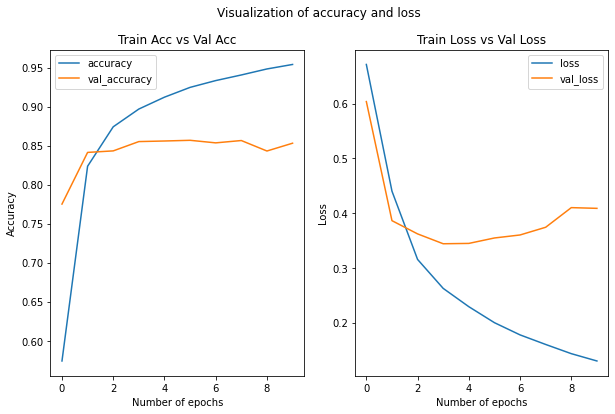

In [6]:
train_padded_final, test_padded_final, train_label_final, test_label_final, vocab_size, embedding_dim, max_len  = preprocess_sarcasm()
# model build and compile
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length = max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units = 24, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
# model train
history_sarcasm_normal = model.fit(train_padded_final, train_label_final, epochs = 10,
                    validation_data = (test_padded_final, test_label_final))
# visualize
plot_graph(history_sarcasm_normal, with_validation = True) 


### 1(b). Building a classifier on sarcasm dataset (Single layer LSTM):

Epoch 1/10
625/625 [==============================] - 19s 25ms/step - loss: 0.5268 - accuracy: 0.6982 - val_loss: 0.3320 - val_accuracy: 0.8571
Epoch 2/10
625/625 [==============================] - 17s 27ms/step - loss: 0.2084 - accuracy: 0.9183 - val_loss: 0.3362 - val_accuracy: 0.8609
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 0.1246 - accuracy: 0.9550 - val_loss: 0.4084 - val_accuracy: 0.8509
Epoch 4/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0767 - accuracy: 0.9734 - val_loss: 0.5133 - val_accuracy: 0.8441
Epoch 5/10
625/625 [==============================] - 18s 28ms/step - loss: 0.0496 - accuracy: 0.9829 - val_loss: 0.6146 - val_accuracy: 0.8441
Epoch 6/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0284 - accuracy: 0.9918 - val_loss: 0.7212 - val_accuracy: 0.8396
Epoch 7/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.8407 - val_accuracy:

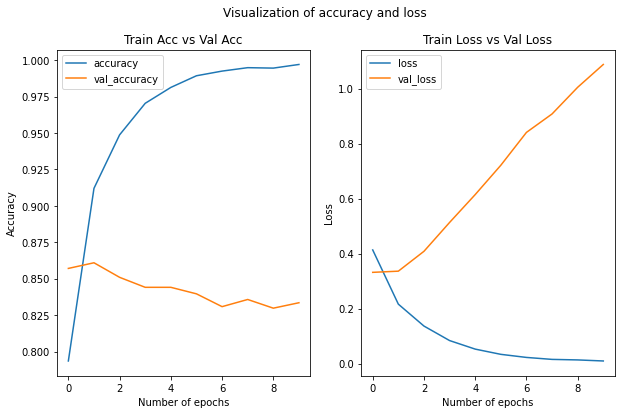

In [7]:
train_padded_final, test_padded_final, train_label_final, test_label_final, vocab_size, embedding_dim, max_len  = preprocess_sarcasm()

# model build
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# model compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# model train
history_sarcasm_single_lstm = model.fit(train_padded_final, train_label_final, epochs = 10,
                    validation_data = (test_padded_final, test_label_final))
# visualize
plot_graph(history_sarcasm_single_lstm, with_validation = True)

### 1(c). Building a classifier on sarcasm dataset (Single Layer Convolution):

Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.5450 - accuracy: 0.6844 - val_loss: 0.3642 - val_accuracy: 0.8389
Epoch 2/10
625/625 [==============================] - 5s 7ms/step - loss: 0.2202 - accuracy: 0.9153 - val_loss: 0.3650 - val_accuracy: 0.8472
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 0.1074 - accuracy: 0.9656 - val_loss: 0.4272 - val_accuracy: 0.8447
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0447 - accuracy: 0.9877 - val_loss: 0.5831 - val_accuracy: 0.8417
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.6936 - val_accuracy: 0.8372
Epoch 6/10
625/625 [==============================] - 5s 9ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.8287 - val_accuracy: 0.8371
Epoch 7/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.8892 - val_accuracy: 0.8360
Epoch 

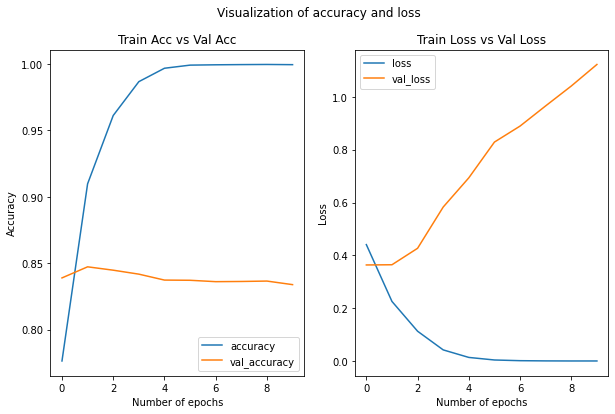

In [8]:
train_padded_final, test_padded_final, train_label_final, test_label_final, vocab_size, embedding_dim, max_len  = preprocess_sarcasm()

#model build
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# model compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


# model train
history_sarcasm_single_gru = model.fit(train_padded_final, train_label_final, epochs = 10,
                    validation_data = (test_padded_final, test_label_final))
# visualize
plot_graph(history_sarcasm_single_gru, with_validation = True)

### 2(a). Working on IMDB dataset (no RNN)

    1. Import the imdb_review dataset, retrieve the train and test sentences and labels, tokenize and pad them and return them in a function.
    2. Then build a model, train and output accuracy.

In [9]:
def preprocessing_imdb_review():
    # import and load the imdb dataset.
    import tensorflow as tf
    import numpy as np
    import tensorflow_datasets as tfds
    imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

    # retrieve the train & test sentences and labels [extract values from tensors]
    train_set, test_set = imdb['train'], imdb['test']
    train_sen, test_sen = [], []
    train_labels, test_labels = [], []
    for sen, label in train_set:
        train_sen.append(str(sen.numpy()))
        train_labels.append(label.numpy())
    for sen, label in test_set:
        test_sen.append(str(sen.numpy()))
        test_labels.append(label.numpy())

    # tensorflow requires to use numpy arrays.
    train_labels_final = np.array(train_labels)
    test_labels_final = np.array(test_labels)

    # hyperparameters
    oov_tok = '<OOV>'
    vocab_size = 10000
    embedding_dim = 16
    max_len = 120

    # tokenizing and padding
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences

    tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
    tokenizer.fit_on_texts(train_sen)
    word_index = tokenizer.word_index

    train_seq = tokenizer.texts_to_sequences(train_sen)
    train_padded = pad_sequences(train_seq, maxlen = max_len)
    test_seq = tokenizer.texts_to_sequences(test_sen)
    test_padded = pad_sequences(test_seq, maxlen = max_len)
    return train_padded, test_padded, train_labels_final, test_labels_final, vocab_size, embedding_dim, max_len

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.5842 - accuracy: 0.6565 - val_loss: 0.3205 - val_accuracy: 0.8598
Epoch 2/10
782/782 [==============================] - 3s 3ms/step - loss: 0.2150 - accuracy: 0.9165

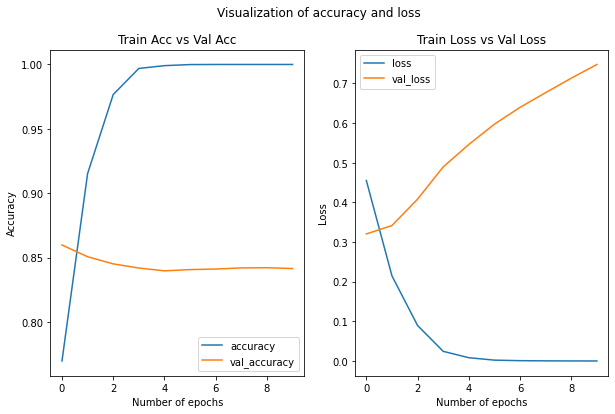

In [10]:
train_padded, test_padded, train_labels_final, test_labels_final, vocab_size, embedding_dim, max_len = preprocessing_imdb_review()
#model build
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length = max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 6, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])
#model compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())
#model train
history_imdb_normal = model.fit(x = train_padded, y = train_labels_final, epochs = 10, 
          validation_data = (test_padded, test_labels_final))

# visualize
plot_graph(history_imdb_normal, with_validation = True)

### 2(a). Working on IMDB dataset (GRU)

Epoch 1/10
782/782 [==============================] - 43s 50ms/step - loss: 0.5740 - accuracy: 0.6625 - val_loss: 0.3356 - val_accuracy: 0.8527
Epoch 2/10
782/782 [==============================] - 43s 54ms/step - loss: 0.2632 - accuracy: 0.8964 - val_loss: 0.3388 - val_accuracy: 0.8561
Epoch 3/10
782/782 [==============================] - 45s 58ms/step - loss: 0.2022 - accuracy: 0.9243 - val_loss: 0.3830 - val_accuracy: 0.8427
Epoch 4/10
782/782 [==============================] - 47s 59ms/step - loss: 0.1503 - accuracy: 0.9454 - val_loss: 0.3751 - val_accuracy: 0.8493
Epoch 5/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1085 - accuracy: 0.9628 - val_loss: 0.4816 - val_accuracy: 0.8404
Epoch 6/10
782/782 [==============================] - 44s 56ms/step - loss: 0.0684 - accuracy: 0.9795 - val_loss: 0.5207 - val_accuracy: 0.8387
Epoch 7/10
782/782 [==============================] - 49s 63ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.6534 - val_accuracy:

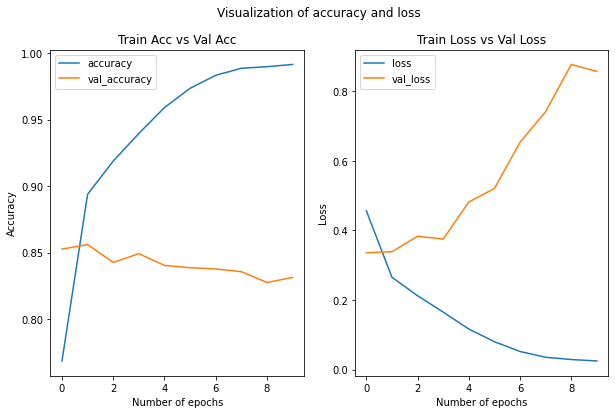

In [12]:
train_padded, test_padded, train_labels_final, test_labels_final, vocab_size, embedding_dim, max_len = preprocessing_imdb_review()
#model build
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#model compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#model train
history_imdb_gru = model.fit(x = train_padded, y = train_labels_final, epochs = 10, 
          validation_data = (test_padded, test_labels_final))
# visualize
plot_graph(history_imdb_gru, with_validation = True)

### 3. Working on the 'imdb_reviews/subwords8k' dataset


#### create e function for pre_processing for future usage

In [ ]:
# import data set and ready the train and test set
def pre_process(dataset_name):
    import tensorflow as tf
    import tensorflow_datasets as tfds
    
    imdb, info = tfds.load(dataset_name, with_info = True, as_supervised = True)
    train_set, test_set = imdb['train'], imdb['test']

    # tokenize and padding.
    tokenizer = info.features['text'].encoder

    # shuffle for better generalization
    train_set = train_set.shuffle(buffer_size = 10000) 

    # padding
    batch_size = 64
    padded_shape_train = tf.compat.v1.data.get_output_shapes(train_set)
    train_set = train_set.padded_batch(batch_size, padded_shape_train)
    padded_shape_test = tf.compat.v1.data.get_output_shapes(test_set)
    test_set = test_set.padded_batch(batch_size, padded_shape_test)
    return train_set, test_set

###  3(a). Working on subwords8k dataset(Single Layer LSTM)

In [ ]:
train_set, test_set = pre_process('imdb_reviews/subwords8k')
# model build
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])
# model compile
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# model train
history_single_lstm = model.fit(train_set, epochs = 10, validation_data = test_set)

In [ ]:
# visualize the loss and accuracy
plot_graph(history_single_lstm, with_validation = True)

###  3(b). Working on subwords8k dataset(Multiple Layer LSTM)

In [ ]:
# dataset preprocess
train_set, test_set = pre_process('imdb_reviews/subwords8k')
# model build
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), 
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])
# model compile
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# model train
history_multi_lstm = model.fit(train_set, epochs = 1, validation_data = test_set)
# visualize the loss and accuracy
plot_graph(history_single_lstm, with_validation = True)

###  3(c). Working on subwords8k dataset(Single Layer Convolution)

In [ ]:
# dataset preprocess
train_set, test_set = pre_process('imdb_reviews/subwords8k')
# model build
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size, output_dim = 64),
    tf.keras.layers.Conv1D(128, 5, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])
# model compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model train
history_multi_gru = model.fit(train_set, epochs = 5, validation_data = test_set)
# visualize the loss and accuracy
plot_graph(history_multi_gru, with_validation = True)

# Generating Text

## 1(a). Building a model fo custom songs.

Epoch 1/500
6/6 [==============================] - 4s 9ms/step - loss: 3.6805 - accuracy: 0.0443
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 3.6378 - accuracy: 0.0614
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 3.5833 - accuracy: 0.0800
Epoch 4/500
6/6 [==============================] - 0s 16ms/step - loss: 3.4886 - accuracy: 0.0534
Epoch 5/500
6/6 [==============================] - 0s 13ms/step - loss: 3.3127 - accuracy: 0.0647
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 3.2483 - accuracy: 0.0806
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 3.2032 - accuracy: 0.1923
Epoch 8/500
6/6 [==============================] - 0s 7ms/step - loss: 3.1825 - accuracy: 0.0931
Epoch 9/500
6/6 [==============================] - 0s 10ms/step - loss: 3.1392 - accuracy: 0.1975
Epoch 10/500
6/6 [==============================] - 0s 11ms/step - loss: 3.0783 - accuracy: 0.2206
Epoch 11/500
6/6 [======

6/6 [==============================] - 0s 13ms/step - loss: 0.3884 - accuracy: 0.9068
Epoch 79/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3852 - accuracy: 0.9250
Epoch 80/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3807 - accuracy: 0.9254
Epoch 81/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3839 - accuracy: 0.9101
Epoch 82/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3607 - accuracy: 0.9202
Epoch 83/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3746 - accuracy: 0.9204
Epoch 84/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3950 - accuracy: 0.9159
Epoch 85/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3406 - accuracy: 0.9249
Epoch 86/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3632 - accuracy: 0.8992
Epoch 87/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3609 - accuracy: 0.9018
Epoch 88/500
6/6 [===========

6/6 [==============================] - 0s 10ms/step - loss: 0.2117 - accuracy: 0.9126
Epoch 243/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2172 - accuracy: 0.9037
Epoch 244/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1978 - accuracy: 0.9164
Epoch 245/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2151 - accuracy: 0.8932
Epoch 246/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1917 - accuracy: 0.9038
Epoch 247/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1712 - accuracy: 0.9488
Epoch 248/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1905 - accuracy: 0.9324
Epoch 249/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2009 - accuracy: 0.9148
Epoch 250/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2005 - accuracy: 0.9167
Epoch 251/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1845 - accuracy: 0.9308
Epoch 252/500
6/6 [

6/6 [==============================] - 0s 8ms/step - loss: 0.2001 - accuracy: 0.9204
Epoch 407/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1764 - accuracy: 0.9209
Epoch 408/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2423 - accuracy: 0.8843
Epoch 409/500
6/6 [==============================] - 0s 9ms/step - loss: 0.5398 - accuracy: 0.8243
Epoch 410/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4892 - accuracy: 0.8521
Epoch 411/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3994 - accuracy: 0.8625
Epoch 412/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2635 - accuracy: 0.9073
Epoch 413/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3470 - accuracy: 0.8755
Epoch 414/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3667 - accuracy: 0.8665
Epoch 415/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3502 - accuracy: 0.8772
Epoch 416/500
6/6 [===

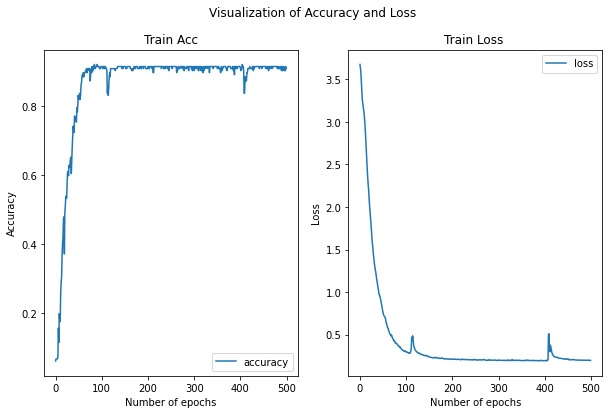

In [161]:
# import Libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Data Preprocessing
lawrence="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
take_me_ride = "If you want to go away from your shell\nTo free yourself finally get out of your cell\nYou said there is a place where you used to hide\nWhere no one ever asks what you got on your mind\nYou said it is a place where the trees grow so high\nThat if you reach the top you can tickle the sky\nThere is a silver river that never ever runs dry\nWhere if you take a swim you will learn how to fly\nSo would you take me for a ride?\nTake me by your side, take me with you\nTake me for a ride, take me by your side, take me with you\nTake me for a ride, take me by your side take me with you\nTake me for a ride, take me by your side, take me with you\nIs this real? It kinda looks like a dream\nIt is even better than I could have imagined\nI wanna fly high and try to tickle the sky\nBut wait a minute, how did we get so high?\nWell I do not care much as long as I see your face\nAnd remember the day when I embraced the space\nWhen you did take me for a ride\nTake me by your side, take me with you\nTake me for a ride, take me by your side, take me with you\nTake me for a ride, take me by your side, take me with you\nTake me for a ride, take me by your side, take me with you\nYeah I want you to know that (oh, oh, oh)\nI would really want to go (oh, oh, oh)\nIf you want me to go (oh, oh, oh)\nI would really want to go (oh, oh, oh)\n\nSo would you take me for a ride?\n\nSome day I would really want to go out\n\nYeah, when the air I breathe will get me full of doubt\n\nSo would you take me where we used to hide\n\nThen nobody will ask what I got on my mind\n\nSo would you\n\nTake me for a ride, take me by your side, take me with you\n\nTake me for a ride, take me by your side, take me with you\n\nTake me for a ride, take me by your side, take me with you\n\nTake me for a ride, take me by your side, take me with you\n\nYeah I want you to know that (oh, oh, oh)\nI would really want to go (oh, oh, oh)\nIf you want me to go (oh, oh, oh)\nI would really want to go (oh, oh, oh)\nSo would you take me for a ride?\n"
let_it_be = 'When I find myself in times of trouble\nMother Mary comes to me\nSpeaking words of wisdom, let it be\nAnd in my hour of darkness\nShe is standing right in front of me\nSpeaking words of wisdom, let it be\nLet it be, let it be\nLet it be, let it be\nWhisper words of wisdom, let it be\nAnd when the broken-hearted people\nLiving in the world agree\nThere will be an answer, let it be\nFor though they may be parted\nThere is still a chance that they will see\nThere will be an answer, let it be\nLet it be, let it be\nLet it be, let it be\nYeah, there will be an answer, let it be\nLet it be, let it be\nLet it be, let it be\nWhisper words of wisdom, let it be\nLet it be, let it be\nLet it be, yeah, let it be\nWhisper words of wisdom, let it be\nAnd when the night is cloudy\nThere is still a light that shines on me\nShine on til tomorrow, let it be\nI wake up to the sound of music\nMother Mary comes to me\nSpeaking words of wisdom, let it be\nLet it be, let it be\nLet it be, yeah, let it be\There will be an answer, let it be\nLet it be, let it be\nLet it be, yeah, let it be\nThere will be an answer, let it be\nLet it be, let it be\nLet it be, yeah, let it be\nWhisper words of wisdom, let it be\n'
hold_hand = "Oh yeah, I will tell you something\nI think you will understand\nWhen I say that something\nI want to hold your hand\nI want to hold your hand\nI want to hold your hand\nOh please, say to me\nYou will let me be your man\nAnd please, say to me\nYou will let me hold your hand\nNow, let me hold your hand\nI want to hold your hand\nAnd when I touch you\nI feel happy inside\nIt is such a feeling that my love\nI can not hide\nI can not hide\nI can not hide\nYeah, you got that something\nI think you will understand\When I say that something\nI want to hold your hand\nI want to hold your hand\nI want to hold your hand\nAnd when I touch you\nI feel happy inside\It is such a feeling that my love\nI can not hide\nI can not hide\I can not hide\nYeah, you got that something\nI think you will understand\nWhen I feel that something\nI want to hold your hand\nI want to hold your hand\nI want to hold your hand\nI want to hold your hand\n"
songs = [lawrence, take_me_ride, let_it_be, hold_hand]
dataset = songs[3].lower().split('\n')

# # tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset)
total_words = len(tokenizer.word_index) + 1


sequences = []
for line in dataset:
    single_seq = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(single_seq)):
        sequences.append(single_seq[:i+1])
# # padding
max_len = max([len(i) for i in sequences])
padded_seq = pad_sequences(sequences, maxlen = max_len, padding = 'pre')

# creating predictor and labels
xs, labels = padded_seq[:, :-1], padded_seq[:, -1]
# converts the labels to one-hot matrix
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

# Model build
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = total_words, output_dim = 64, input_length = max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(units = total_words, activation = 'softmax')
])
# Model compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Model train
history_gen = model.fit(xs, ys, epochs = 500)
# visualize
plot_graph(history_gen, with_validation = False)

## 1(b). Generating text

In [166]:
seed_text = "i feel something"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word 
print(seed_text)

i feel something happy inside it is such a feeling that my love love love love love love love love love love love when love love love love love love love love tell can can not hide hand hand hand to hold your hand hand hand hand hand hand hand hand hand not


## 2(a). Building a model for Irish songs [from URL data]

In [204]:
# import Libraries
import tensorflow as tf
import numpy as np
import json
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# dataset load and retrieve text data
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt"
html = urllib.request.urlopen(url)
data = []
for line in html:
    decoded_line = line.decode('utf_8').strip()
    data.append(decoded_line)

# tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

# making sequence
sequences = []
for line in data:
    single_seq = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(single_seq)):
        sequences.append(single_seq[:i+1])
        
# padding
max_len = max([len(n) for n in sequences])
padded_seq = pad_sequences(sequences, maxlen = max_len, padding = 'pre')

# making xs and ys
xs, labels = padded_seq[:, :-1], padded_seq[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# model build
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = total_words, output_dim = 128, input_length = max_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(units = total_words, activation = 'softmax')
])
# model compile
from tensorflow.keras.optimizers import Adam
adam = Adam(lr = 0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# model train
history_sheks = model.fit(xs, ys, epochs = 100)


Epoch 1/100
377/377 [==============================] - 13s 25ms/step - loss: 6.8259 - accuracy: 0.0655
Epoch 2/100
377/377 [==============================] - 9s 25ms/step - loss: 5.8200 - accuracy: 0.1021
Epoch 3/100
377/377 [==============================] - 11s 28ms/step - loss: 4.9219 - accuracy: 0.1551
Epoch 4/100
377/377 [==============================] - 10s 28ms/step - loss: 3.9648 - accuracy: 0.2436
Epoch 5/100
377/377 [==============================] - 13s 33ms/step - loss: 3.2095 - accuracy: 0.3425
Epoch 6/100
377/377 [==============================] - 12s 31ms/step - loss: 2.7265 - accuracy: 0.4171
Epoch 7/100
377/377 [==============================] - 12s 32ms/step - loss: 2.1549 - accuracy: 0.5126
Epoch 8/100
377/377 [==============================] - 11s 30ms/step - loss: 1.8187 - accuracy: 0.5834
Epoch 9/100
377/377 [==============================] - 12s 31ms/step - loss: 1.5915 - accuracy: 0.6250
Epoch 10/100
377/377 [==============================] - 12s 31ms/step - lo

NameError: name 'hsitory_sheks' is not defined

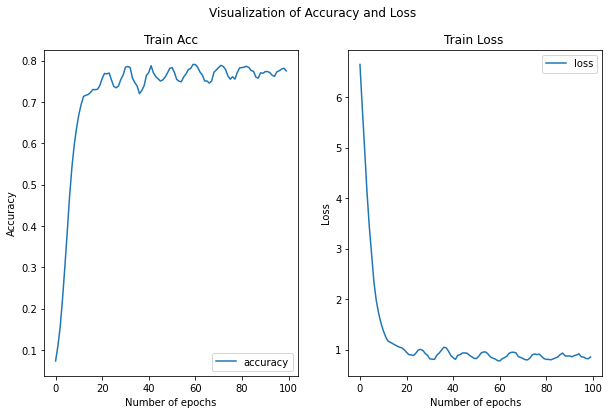

In [205]:
#visualize 
plot_graph(history_sheks, with_validation = False)

## 2(b). Generating text

In [210]:
seed_text = "I've got a bad feeling about this"
next_words = 200
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=maxlen-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word 
print(seed_text)

I've got a bad feeling about this end you a man to lead but a plain to leave my did my did say me nay never no more on the fray of night but never a vision o true them diggin i am lying my home in me or all on their mantle were spreading you will leave you has should truth gone away at home with gold a earnest stalwart band came oer me weather dear love reap and tree i hired wages but black in killarney dirty hand sons days gone by death saxon that tay gave together i eer and december i lady saw love shall love love she let me call your mother i alone her lover confess claret be on drinking see the lassies smile laughing love says you life easy as the leaves grow on by night eyes passed that we wandered with wild delight in rosin the bow of the moaning flood shannon free invitation free free free boundless saw you stand abusing moving marry her fade away you were late im bride away you love with me again kathleen love by forever love by the bridle art heavenward winging fine blooming h